# Q-러닝 이해하기: 완전 가이드

# 목차

- [소개](#introduction)
- [Q-러닝이란?](#what-is-q-learning)
- [Q-러닝 사용처 및 방법](#where-and-how-q-learning-is-used)
- [Q-러닝의 수학적 기초](#mathematical-foundation-of-q-learning)
  - [복잡한 원본 버전](#complex-original-version)
  - [단순화된 버전](#simplified-version)
- [Q-러닝 단계별 설명](#step-by-step-explanation-of-q-learning)
- [Q-러닝의 핵심 요소](#key-components-of-q-learning)
  - [Q-테이블](#q-table)
  - [탐험 vs. 활용](#exploration-vs-exploitation)
  - [학습률 (α)](#learning-rate-a)
  - [할인율 (γ)](#discount-factor-g)
- [실용 예제: 그리드 월드](#practical-example-grid-world)
  - [환경 설정](#setting-up-the-environment)
  - [간단한 환경 생성](#creating-a-simple-environment)
  - [Q-러닝 알고리즘 구현](#implementing-the-q-learning-algorithm)
  - [Q-테이블 초기화 및 업데이트](#q-table-initialization-and-updates)
  - [탐험 vs. 활용 전략](#exploration-vs-exploitation-strategy)
  - [Q-러닝 알고리즘 실행](#running-the-q-learning-algorithm)
  - [학습 과정 시각화](#visualizing-the-learning-process)
  - [Q-값 및 최적 정책 분석](#analyzing-q-values-and-optimal-policy)
- [다른 하이퍼파라미터로 테스트하기 (선택 사항)](#testing-with-different-hyperparameters-optional)
- [다른 환경에 Q-러닝 적용하기 (절벽 걷기)](#applying-q-learning-to-different-environments-cliff-walking)
- [일반적인 문제점 및 해결책](#common-challenges-and-solutions)
- [Q-러닝 vs. 다른 강화 학습 알고리즘](#q-learning-vs-other-reinforcement-learning-algorithms)
  - [Q-러닝의 장점](#advantages-of-q-learning)
  - [Q-러닝의 한계](#limitations-of-q-learning)
  - [관련 알고리즘](#related-algorithms)
- [결론](#conclusion)

## Q-러닝이란?

Q-러닝은 강화 학습 알고리즘으로, 에이전트가 시행착오를 통해 어떤 행동이 가장 높은 보상을 얻는지 발견함으로써 주어진 상황에서 최적의 행동을 학습할 수 있게 합니다. 이는 모델-프리(model-free), 가치 기반(value-based) 학습 알고리즘으로, 환경의 모델 없이도 학습할 수 있음을 의미합니다. 대신, 다른 상태에서 행동을 취한 후 받는 보상으로부터 학습합니다.

Q-러닝의 "Q"는 "품질(quality)"을 의미하며, 본질적으로 주어진 행동이 미래의 보상을 얻는 데 얼마나 유용한지를 나타냅니다.

## Q-러닝 사용처 및 방법

Q-러닝은 다음과 같은 분야에서 널리 사용됩니다:

1. **로봇 공학**: 로봇에게 환경 탐색, 물체 집기, 작업 완료 방법 교육
2. **게임 플레이**: 게임(아타리 게임 또는 보드 게임 등)을 마스터할 수 있는 에이전트 생성
3. **자원 관리**: 엘리베이터 제어 또는 신호등 관리와 같은 시스템에서의 의사결정 최적화
4. **추천 시스템**: 사용자 선호도를 학습하여 제품 또는 콘텐츠 추천
5. **자율 주행 차량**: 자율 주행차가 의사결정을 내리는 데 도움

Q-러닝은 다음과 같은 환경에서 특히 잘 작동합니다:
- 환경의 규칙이나 모델을 모를 때
- 환경에 명확한 상태와 행동이 있을 때
- 잘 정의된 보상 신호가 있을 때
- 환경이 완전히 관찰 가능할 때 (에이전트가 전체 상태를 볼 수 있음)

## Q-러닝의 수학적 기초

### 복잡한 원본 버전

Q-러닝 알고리즘은 벨만 방정식을 사용하여 Q-값을 업데이트합니다:

$$Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha \left[r_t + \gamma \max_{a} Q(s_{t+1}, a) - Q(s_t, a_t)\right]$$

여기서:
- $Q(s_t, a_t)$는 상태 $s_t$와 행동 $a_t$에 대한 Q-값입니다.
- $\alpha$는 학습률입니다 (0 < $\alpha$ ≤ 1).
- $r_t$는 상태 $s_t$에서 행동 $a_t$를 취한 후 받은 보상입니다.
- $\gamma$는 미래 보상에 대한 할인율입니다 (0 ≤ $\gamma$ ≤ 1).
- $\max_{a} Q(s_{t+1}, a)$는 다음 상태 $s_{t+1}$에서 가능한 모든 행동에 대한 최대 Q-값입니다.
- 대괄호 안의 항 $[r_t + \gamma \max_{a} Q(s_{t+1}, a) - Q(s_t, a_t)]$은 시간차(Temporal Difference, TD) 오차입니다.

### 단순화된 버전

더 간단한 용어로 Q-러닝 업데이트는 다음과 같이 이해할 수 있습니다:



$$
Q_{\text{new}} = Q_{\text{old}} + \alpha \left[ R + \gamma \max Q_{\text{future}} - Q_{\text{old}} \right]
$$



또는 더 간단하게:



$$
Q_{\text{new}} = Q_{\text{old}} + \alpha \left[ \text{Target} - Q_{\text{old}} \right]
$$



여기서 "Target"은 보상과 할인된 미래 가치의 합입니다.

## Q-러닝 단계별 설명

1. **Q-테이블 초기화**: 각 상태에 대한 행과 각 행동에 대한 열을 가진 테이블을 생성하고, 초기에는 0 또는 임의의 값으로 채웁니다.

2. **행동 선택**: 상태 $s$에서 탐험 전략(예: 엡실론 그리디)을 사용하여 행동 $a$를 선택합니다.

3. **행동 수행**: 행동 $a$를 실행하고, 보상 $r$과 새로운 상태 $s'$를 관찰합니다.

4. **Q-값 업데이트**: Q-러닝 업데이트 공식을 적용하여 상태-행동 쌍의 Q-값을 조정합니다.

5. **다음 상태로 이동**: 현재 상태를 새로운 상태 $s'$로 설정합니다.

6. **2-5단계 반복**: 종료 상태에 도달하거나 최대 단계 수에 도달할 때까지 이 과정을 계속합니다.

7. **여러 에피소드 반복**: 에이전트가 다른 상태-행동 쌍을 탐험하고 Q-값을 개선할 수 있도록 여러 에피소드를 실행합니다.

## Q-러닝의 핵심 요소

### Q-테이블
Q-테이블은 다음과 같은 조회 테이블입니다:
- 행은 환경의 상태를 나타냅니다.
- 열은 가능한 행동을 나타냅니다.
- 각 셀에는 해당 상태에서 해당 행동을 취했을 때 예상되는 미래 보상을 나타내는 Q-값이 포함됩니다.

예를 들어, 간단한 그리드 월드에서:

| 상태  | 위  | 아래 | 왼쪽 | 오른쪽 |
|-------|---|------|------|-------|
| (0,0) | 0.0 | 0.0 | 0.0 | 0.0 |
| (0,1) | 0.0 | 0.0 | 0.0 | 0.0 |
| ... | ... | ... | ... | ... |

### 탐험 vs. 활용

강화 학습의 핵심 과제 중 하나는 다음 사이의 균형입니다:

- **탐험(Exploration)**: 더 나은 보상을 발견하기 위해 새로운 행동을 시도하는 것 (위험 감수)
- **활용(Exploitation)**: 에이전트가 이미 알고 있는 것을 사용하여 보상을 최대화하는 것 (안전하게 플레이)

**엡실론 그리디(epsilon-greedy)** 전략은 이러한 균형을 맞추기 위해 일반적으로 사용됩니다:
- 확률 $\epsilon$으로 임의의 행동을 선택합니다 (탐험).
- 확률 $1-\epsilon$으로 가장 높은 Q-값을 가진 행동을 선택합니다 (활용).
- $\epsilon$은 일반적으로 에이전트가 환경에 대해 더 많이 배우면서 시간이 지남에 따라 감소합니다.

### 학습률 (α)
- 새로운 정보가 오래된 정보를 얼마나 덮어쓰는지 제어합니다.
- 높은 학습률 (1에 가까움): 빠르게 학습하지만 불안정해질 수 있습니다.
- 낮은 학습률 (0에 가까움): 느리게 학습하지만 더 안정적입니다.
- 일반적인 값: 0.1 ~ 0.5

### 할인율 (γ)
- 즉각적인 보상과 비교하여 미래 보상의 중요성을 결정합니다.
- γ = 0: 에이전트는 즉각적인 보상만 고려합니다 (단기적).
- γ = 1: 에이전트는 미래 보상을 즉각적인 보상과 동일하게 평가합니다 (장기적).
- 일반적인 값: 0.9 ~ 0.99

## 실용 예제: 그리드 월드

노트북의 예제에서는 Q-러닝이 다음과 같은 그리드 월드에 적용됩니다:
- 에이전트는 4×4 그리드를 탐색합니다.
- 종료 상태는 (0,0) (보상 1)과 (3,3) (보상 10)입니다.
- 다른 모든 상태는 보상 0입니다.
- 에이전트는 위, 아래, 왼쪽, 오른쪽으로 이동할 수 있습니다.
- 목표는 가장 높은 보상으로 가는 최적의 경로를 학습하는 것입니다.

에이전트가 탐험하면서 Q-값을 업데이트하고 점차 환경을 통과하는 최상의 경로를 학습합니다. 시각화는 에이전트가 무작위로 탐험을 시작하여 결국 최적 정책으로 수렴하는 방식을 보여줍니다.

# 환경 설정
수치 연산을 위한 NumPy와 시각화를 위한 Matplotlib 등 필요한 라이브러리를 임포트합니다.

In [1]:
# 필요한 라이브러리 임포트
import numpy as np  # 수치 연산용
import matplotlib.pyplot as plt  # 시각화용

# 타입 힌트 임포트
from typing import List, Tuple, Dict, Optional

# 재현성을 위한 시드 설정
np.random.seed(42)

# Jupyter Notebook에서 인라인 플로팅 활성화
%matplotlib inline

# 간단한 환경 생성

Q-러닝 알고리즘을 위한 간단한 환경을 만들기 위해 4x4 그리드 월드를 정의합니다. 그리드 월드는 다음과 같은 속성을 갖습니다:
    
- 4개의 행과 4개의 열
- 가능한 행동: 'up', 'down', 'left', 'right'

In [2]:
# 그리드 월드 환경 정의
def create_gridworld(
    rows: int, 
    cols: int, 
    terminal_states: List[Tuple[int, int]], 
    rewards: Dict[Tuple[int, int], int]
) -> Tuple[np.ndarray, List[Tuple[int, int]], List[str]]:
    """
    간단한 그리드 월드 환경을 생성합니다.
    
    매개변수:
    - rows (int): 그리드의 행 수.
    - cols (int): 그리드의 열 수.
    - terminal_states (List[Tuple[int, int]]): (행, 열) 튜플로 구성된 종료 상태 목록.
    - rewards (Dict[Tuple[int, int], int]): (행, 열)을 보상 값에 매핑하는 딕셔너리.
    
    반환값:
    - grid (np.ndarray): 보상을 포함한 그리드를 나타내는 2D 배열.
    - state_space (List[Tuple[int, int]]): 그리드 내 가능한 모든 상태의 목록.
    - action_space (List[str]): 가능한 행동 목록 ('up', 'down', 'left', 'right').
    """
    # 그리드를 0으로 초기화
    grid = np.zeros((rows, cols))
    
    # 지정된 상태에 보상 할당
    for (row, col), reward in rewards.items():
        grid[row, col] = reward
    
    # 상태 공간을 모든 가능한 (행, 열) 쌍으로 정의
    state_space = [
        (row, col) 
        for row in range(rows) 
        for col in range(cols)
    ]
    
    # 행동 공간을 네 가지 가능한 이동으로 정의
    action_space = ['up', 'down', 'left', 'right']
    
    return grid, state_space, action_space


다음으로 상태 전이 함수가 필요합니다. 이 함수는 현재 상태와 행동을 입력으로 받아 다음 상태를 반환합니다. 이는 에이전트가 취하는 행동에 따라 그리드를 이동하는 것으로 생각할 수 있습니다.

In [3]:
# 상태 전이 함수 정의
def state_transition(state: Tuple[int, int], action: str, rows: int, cols: int) -> Tuple[int, int]:
    """
    현재 상태와 행동이 주어졌을 때 다음 상태를 계산합니다.
    
    매개변수:
    - state (Tuple[int, int]): 현재 상태 (행, 열).
    - action (str): 취할 행동 ('up', 'down', 'left', 'right').
    - rows (int): 그리드의 행 수.
    - cols (int): 그리드의 열 수.
    
    반환값:
    - Tuple[int, int]: 행동을 취한 후의 결과 상태 (행, 열).
    """
    # 현재 상태를 행과 열로 언패킹
    row, col = state

    # 행동에 따라 행 또는 열 업데이트, 경계를 존중하도록 보장
    if action == 'up' and row > 0:  # 가장 위쪽 행이 아니면 위로 이동
        row -= 1
    elif action == 'down' and row < rows - 1:  # 가장 아래쪽 행이 아니면 아래로 이동
        row += 1
    elif action == 'left' and col > 0:  # 가장 왼쪽 열이 아니면 왼쪽으로 이동
        col -= 1
    elif action == 'right' and col < cols - 1:  # 가장 오른쪽 열이 아니면 오른쪽으로 이동
        col += 1

    # 새로운 상태를 튜플로 반환
    return (row, col)


이제 에이전트가 환경과 상호작용할 수 있으므로 보상 함수를 정의해야 합니다. 이 함수는 주어진 상태에 대한 보상을 반환하며, 이는 훈련 중 Q-값을 업데이트하는 데 사용됩니다.

In [4]:
# 보상 함수 정의
def get_reward(state: Tuple[int, int], rewards: Dict[Tuple[int, int], int]) -> int:
    """
    주어진 상태에 대한 보상을 얻습니다.

    매개변수:
    - state (Tuple[int, int]): 현재 상태 (행, 열).
    - rewards (Dict[Tuple[int, int], int]): (행, 열)을 보상 값에 매핑하는 딕셔너리.

    반환값:
    - int: 주어진 상태에 대한 보상. 상태가 rewards 딕셔너리에 없으면 0을 반환합니다.
    """
    # rewards 딕셔너리를 사용하여 주어진 상태의 보상을 가져옵니다.
    # 상태를 찾을 수 없으면 기본 보상 0을 반환합니다.
    return rewards.get(state, 0)

이제 그리드 월드 환경과 필요한 도우미 함수를 정의했으므로 간단한 예제로 테스트해 보겠습니다. (0, 0)과 (3, 3)에 각각 1과 10의 보상을 갖는 두 개의 종료 상태가 있는 4x4 그리드를 생성합니다. 그런 다음 상태 (2, 2)에서 위쪽으로 이동하여 상태 전이 및 보상 함수를 테스트합니다.

In [5]:
# 그리드 월드 환경 사용 예제

# 그리드 차원(4x4), 종료 상태 및 보상 정의
rows, cols = 4, 4  # 그리드의 행과 열 수
terminal_states = [(0, 0), (3, 3)]  # 보상이 있는 종료 상태
rewards = {(0, 0): 1, (3, 3): 10}  # 종료 상태에 대한 보상

# 그리드 월드 환경 생성
grid, state_space, action_space = create_gridworld(rows, cols, terminal_states, rewards)

# 상태 전이 및 보상 함수 테스트
current_state = (2, 2)  # 시작 상태
action = 'up'  # 취할 행동
next_state = state_transition(current_state, action, rows, cols)  # 다음 상태 계산
reward = get_reward(next_state, rewards)  # 다음 상태에 대한 보상 얻기

# 결과 출력
print("그리드 월드:")  # 보상이 포함된 그리드 표시
print(grid)
print(f"현재 상태: {current_state}")  # 현재 상태 표시
print(f"취한 행동: {action}")  # 취한 행동 표시
print(f"다음 상태: {next_state}")  # 결과 다음 상태 표시
print(f"보상: {reward}")  # 다음 상태에 대한 보상 표시

그리드 월드:
[[ 1.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0. 10.]]
현재 상태: (2, 2)
취한 행동: up
다음 상태: (1, 2)
보상: 0


지정된 차원, 종료 상태 및 보상으로 그리드 월드 환경이 생성된 것을 볼 수 있습니다. 시작 상태 (2, 2)와 취할 행동 ('up')을 무작위로 선택했습니다. 다음 상태는 (1, 2)로 계산되며 보상은 0입니다. 왜냐하면 `terminal_states` 딕셔너리에 이 상태가 포함되어 있지 않기 때문입니다.

# Q-러닝 알고리즘 구현

이제 상태 전이 및 보상 함수를 사용하여 그리드 월드 환경을 성공적으로 구현했습니다. 이 환경을 사용하여 Q-러닝 알고리즘을 구현할 수 있습니다. 먼저 Q-테이블을 초기화해야 합니다. Q-테이블은 상태-행동 쌍을 Q-값에 매핑하는 딕셔너리입니다. Q-값은 주어진 상태에서 특정 행동을 취할 때 예상되는 누적 보상을 나타냅니다.

In [6]:
# Q-테이블 초기화
def initialize_q_table(state_space: List[Tuple[int, int]], action_space: List[str]) -> Dict[Tuple[int, int], Dict[str, float]]:
    """
    모든 상태-행동 쌍에 대해 Q-테이블을 0으로 초기화합니다.

    매개변수:
    - state_space (List[Tuple[int, int]]): 환경의 모든 가능한 상태 목록, (행, 열) 튜플로 표현됩니다.
    - action_space (List[str]): 가능한 모든 행동 목록 (예: 'up', 'down', 'left', 'right').

    반환값:
    - q_table (Dict[Tuple[int, int], Dict[str, float]]): 각 상태가 다른 딕셔너리에 매핑되는 딕셔너리입니다.
      내부 딕셔너리는 각 행동을 해당 Q-값에 매핑하며, 0으로 초기화됩니다.
    """
    q_table: Dict[Tuple[int, int], Dict[str, float]] = {}
    for state in state_space:
        # 주어진 상태의 모든 행동에 대한 Q-값을 0으로 초기화
        q_table[state] = {action: 0.0 for action in action_space}
    return q_table


다음으로 엡실론 그리디 정책을 사용하여 행동을 선택하는 함수를 정의합니다. 만약 무작위 값이 엡실론보다 작으면 무작위 행동을 선택하고, 그렇지 않으면 현재 상태에 대해 가장 높은 Q-값을 가진 행동을 선택합니다.

In [7]:
# 엡실론 그리디 정책을 사용하여 행동 선택
def choose_action(state: Tuple[int, int], q_table: Dict[Tuple[int, int], Dict[str, float]], action_space: List[str], epsilon: float) -> str:
    """
    엡실론 그리디 정책을 사용하여 행동을 선택합니다.

    매개변수:
    - state (Tuple[int, int]): 현재 상태 (행, 열).
    - q_table (Dict[Tuple[int, int], Dict[str, float]]): 상태-행동 쌍을 Q-값에 매핑하는 Q-테이블.
    - action_space (List[str]): 가능한 행동 목록 (예: 'up', 'down', 'left', 'right').
    - epsilon (float): 탐험 비율 (0 <= epsilon <= 1).

    반환값:
    - str: 선택된 행동.
    """
    # 확률 엡실론으로 무작위 행동 선택 (탐험)
    if np.random.rand() < epsilon:
        return np.random.choice(action_space)
    # 그렇지 않으면 현재 상태에 대해 가장 높은 Q-값을 가진 행동 선택 (활용)
    else:
        # q_table[state] 딕셔너리에서 값이 가장 큰 키(행동)를 반환
        return max(q_table[state], key=q_table[state].get)


행동을 취하고 보상과 다음 상태를 관찰한 후에는 Q-러닝 업데이트 규칙을 사용하여 Q-값을 업데이트할 수 있습니다. 업데이트 규칙은 다음과 같습니다:
$$
Q(s, a) = Q(s, a) + α * [R(s) + γ * max(Q(s', a')) - Q(s, a)]
$$

In [8]:
# Q-값 업데이트
def update_q_value(
    q_table: Dict[Tuple[int, int], Dict[str, float]], 
    state: Tuple[int, int], 
    action: str, 
    reward: int, 
    next_state: Tuple[int, int], 
    alpha: float, 
    gamma: float, 
    action_space: List[str]
) -> None:
    """
    Q-러닝 업데이트 규칙을 사용하여 Q-값을 업데이트합니다.

    매개변수:
    - q_table (Dict[Tuple[int, int], Dict[str, float]]): 상태-행동 쌍을 Q-값에 매핑하는 Q-테이블.
    - state (Tuple[int, int]): 현재 상태 (행, 열).
    - action (str): 취한 행동.
    - reward (int): 받은 보상.
    - next_state (Tuple[int, int]): 다음 상태 (행, 열).
    - alpha (float): 학습률 (0 < alpha <= 1).
    - gamma (float): 할인율 (0 <= gamma <= 1).
    - action_space (List[str]): 가능한 행동 목록.

    반환값:
    - None: Q-테이블을 제자리에서 업데이트합니다.
    """
    # 다음 상태에 대해 가능한 모든 행동 중 최대 Q-값을 가져옵니다.
    # 다음 상태가 q_table에 있으면 해당 상태의 값들 중 최대값을, 없으면 0.0을 사용합니다.
    max_next_q: float = max(q_table[next_state].values()) if next_state in q_table else 0.0

    # 현재 상태-행동 쌍의 Q-값을 Q-러닝 공식으로 업데이트합니다.
    q_table[state][action] += alpha * (reward + gamma * max_next_q - q_table[state][action])


지금까지 그리드 월드 환경, 상태 전이 함수, 보상 함수 및 Q-러닝 업데이트 규칙을 정의했습니다. 또한 Q-테이블 초기화, 엡실론 그리디 정책을 사용한 행동 선택 및 Q-값 업데이트 함수를 구현했습니다. 이제 모든 것을 종합하여 그리드 월드 환경에서 여러 에피소드의 Q-러닝을 실행할 수 있습니다.

In [9]:
# 단일 에피소드 실행
def run_episode(
    q_table: Dict[Tuple[int, int], Dict[str, float]], 
    state_space: List[Tuple[int, int]], 
    action_space: List[str], 
    rewards: Dict[Tuple[int, int], int], 
    rows: int, 
    cols: int, 
    alpha: float, 
    gamma: float, 
    epsilon: float, 
    max_steps: int
) -> int:
    """
    Q-러닝의 단일 에피소드를 실행합니다.

    매개변수:
    - q_table (Dict[Tuple[int, int], Dict[str, float]]): 상태-행동 쌍을 Q-값에 매핑하는 Q-테이블.
    - state_space (List[Tuple[int, int]]): 환경의 모든 가능한 상태 목록.
    - action_space (List[str]): 가능한 행동 목록 (예: 'up', 'down', 'left', 'right').
    - rewards (Dict[Tuple[int, int], int]): 상태(행, 열)를 보상 값에 매핑하는 딕셔너리.
    - rows (int): 그리드의 행 수.
    - cols (int): 그리드의 열 수.
    - alpha (float): 학습률 (0 < alpha <= 1).
    - gamma (float): 할인율 (0 <= gamma <= 1).
    - epsilon (float): 탐험 비율 (0 <= epsilon <= 1).
    - max_steps (int): 에피소드에서 허용되는 최대 단계 수.

    반환값:
    - int: 에피소드 동안 누적된 총 보상.
    """
    # 무작위 상태에서 시작
    state: Tuple[int, int] = state_space[np.random.choice(len(state_space))]
    total_reward: int = 0  # 에피소드의 총 보상 초기화

    # 최대 단계 수만큼 반복
    for _ in range(max_steps):
        # 엡실론 그리디 정책을 사용하여 행동 선택
        action: str = choose_action(state, q_table, action_space, epsilon)
        
        # 선택된 행동에 따라 다음 상태 계산
        next_state: Tuple[int, int] = state_transition(state, action, rows, cols)
        
        # 다음 상태에 대한 보상 얻기
        reward: int = get_reward(next_state, rewards)
        
        # 현재 상태-행동 쌍의 Q-값 업데이트
        update_q_value(q_table, state, action, reward, next_state, alpha, gamma, action_space)
        
        # 보상 누적
        total_reward += reward
        
        # 다음 상태로 이동
        state = next_state
        
        # 에이전트가 종료 상태에 도달했는지 확인
        if state in terminal_states:
            break
    
    # 에피소드 동안 누적된 총 보상 반환
    return total_reward


이제 그리드 월드 환경에서 에이전트를 훈련하기 위해 여러 에피소드의 Q-러닝을 실행할 수 있습니다. 각 에피소드에서 누적된 총 보상을 추적하고 라인 플롯을 사용하여 시간 경과에 따른 보상을 시각화합니다.

/home/peras/repos/oiotoxt/all-rl-algorithms-fork/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/peras/repos/oiotoxt/all-rl-algorithms-fork/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/peras/repos/oiotoxt/all-rl-algorithms-fork/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/peras/repos/oiotoxt/all-rl-algorithms-fork/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/peras/repos/oiotoxt/all

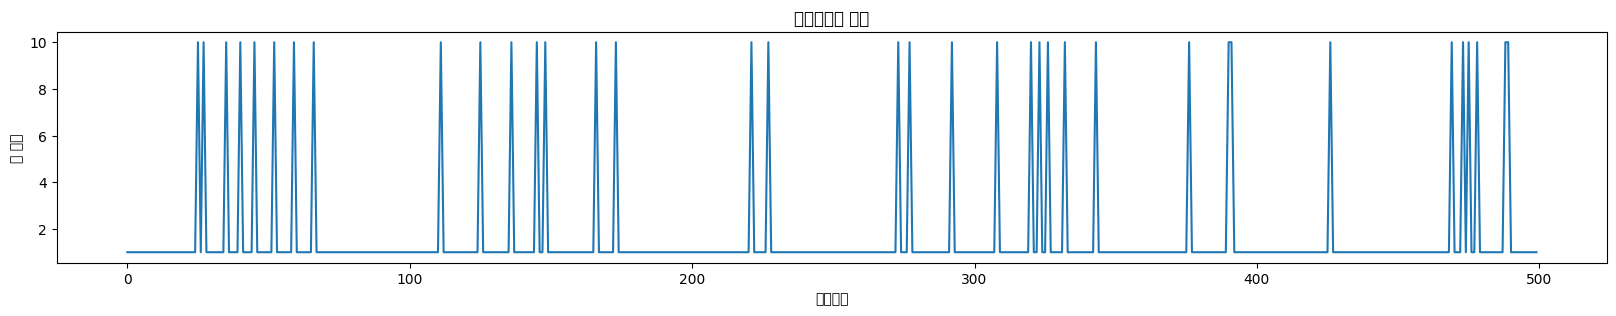

In [10]:
# Q-러닝 알고리즘의 하이퍼파라미터 설정
alpha = 0.1  # 학습률: 새로운 정보가 오래된 정보를 얼마나 덮어쓰는지 결정
gamma = 0.9  # 할인율: 미래 보상의 중요성을 결정
epsilon = 0.1  # 탐험 비율: 무작위 행동을 선택할 확률 (탐험 vs. 활용)
max_steps = 100  # 에피소드당 허용되는 최대 단계 수
episodes = 500  # 실행할 총 에피소드 수

# 모든 상태-행동 쌍에 대해 Q-테이블을 0으로 초기화
q_table = initialize_q_table(state_space, action_space)

# 각 에피소드에서 누적된 총 보상을 저장할 리스트
rewards_per_episode = []

# 여러 에피소드의 Q-러닝 실행
for episode in range(episodes):
    # 단일 에피소드를 실행하고 총 보상 얻기
    total_reward = run_episode(q_table, state_space, action_space, rewards, rows, cols, alpha, gamma, epsilon, max_steps)
    # 이번 에피소드의 총 보상을 보상 리스트에 추가
    rewards_per_episode.append(total_reward)

# 가시성을 높이기 위해 그림 크기 조정
plt.figure(figsize=(20, 3))

# 에피소드에 걸쳐 누적된 총 보상 플로팅
plt.plot(rewards_per_episode)
plt.xlabel('에피소드')  # x축 레이블
plt.ylabel('총 보상')  # y축 레이블
plt.title('에피소드별 보상')  # 플롯 제목
plt.show()  # 플롯 표시

**관찰된 학습 행동:**

- **초기 에피소드**: 대부분 0 보상, 에이전트가 탐험 중임을 의미합니다.
- **후기 에피소드**: 높은 보상 스파이크는 에이전트가 때때로 목표를 찾지만 일관성이 없음을 시사합니다.
- **변동**: 정책이 아직 안정적이지 않음을 나타냅니다.

# Q-테이블 초기화 및 업데이트
경험을 바탕으로 Q-테이블을 초기화하고 업데이트하는 함수를 구현합니다. 이때 Q-러닝 업데이트 규칙을 사용합니다.

In [11]:
# Q-테이블 초기화
def initialize_q_table(state_space, action_space):
    """
    Q-테이블을 0으로 초기화합니다.
    
    매개변수:
    - state_space: 가능한 모든 상태 목록.
    - action_space: 가능한 행동 목록.
    
    반환값:
    - q_table: 상태-행동 쌍을 Q-값에 매핑하는 딕셔너리.
    """
    q_table = {}
    for state in state_space:
        q_table[state] = {action: 0 for action in action_space}
    return q_table

# 엡실론 그리디 정책을 사용하여 행동 선택
def choose_action(state, q_table, action_space, epsilon):
    """
    엡실론 그리디 정책을 사용하여 행동을 선택합니다.
    
    매개변수:
    - state: 현재 상태 (행, 열).
    - q_table: 상태-행동 쌍을 Q-값에 매핑하는 Q-테이블.
    - action_space: 가능한 행동 목록.
    - epsilon: 탐험 비율.
    
    반환값:
    - action: 선택된 행동.
    """
    if np.random.rand() < epsilon:
        return np.random.choice(action_space)  # 탐험
    else:
        # q_table[state] 딕셔너리에서 값이 가장 큰 키(행동)를 반환
        return max(q_table[state], key=q_table[state].get)  # 활용

# Q-값 업데이트
def update_q_value(q_table, state, action, reward, next_state, alpha, gamma, action_space):
    """
    Q-러닝 업데이트 규칙을 사용하여 Q-값을 업데이트합니다.
    
    매개변수:
    - q_table: 상태-행동 쌍을 Q-값에 매핑하는 Q-테이블.
    - state: 현재 상태 (행, 열).
    - action: 취한 행동.
    - reward: 받은 보상.
    - next_state: 다음 상태 (행, 열).
    - alpha: 학습률.
    - gamma: 할인율.
    - action_space: 가능한 행동 목록.
    
    반환값:
    - None (q_table을 제자리에서 업데이트).
    """
    # 다음 상태에 대해 가능한 모든 행동 중 최대 Q-값을 가져옵니다.
    # 다음 상태가 q_table에 있으면 해당 상태의 값들 중 최대값을, 없으면 0을 사용합니다.
    max_next_q = max(q_table[next_state].values()) if next_state in q_table else 0
    # 현재 상태-행동 쌍의 Q-값을 Q-러닝 공식으로 업데이트합니다.
    q_table[state][action] += alpha * (reward + gamma * max_next_q - q_table[state][action])

# 탐험 vs. 활용 전략
이제 탐험 vs. 활용 전략을 제대로 사용하기 위해 이를 적절하게 구현해야 합니다. 첫 번째 함수는 엡실론 값에 따라 행동을 선택하는 엡실론 그리디 정책입니다.

In [12]:
# 엡실론 그리디 정책 정의
def epsilon_greedy_policy(
    q_table: Dict[Tuple[int, int], Dict[str, float]], 
    state: Tuple[int, int], 
    action_space: List[str], 
    epsilon: float
) -> str:
    """
    행동 선택을 위한 엡실론 그리디 정책을 구현합니다.
    
    매개변수:
    - q_table (Dict[Tuple[int, int], Dict[str, float]]): 상태-행동 쌍을 Q-값에 매핑하는 Q-테이블.
    - state (Tuple[int, int]): 현재 상태 (행, 열).
    - action_space (List[str]): 가능한 행동 목록.
    - epsilon (float): 탐험 비율.
    
    반환값:
    - str: 선택된 행동.
    """
    # 확률 엡실론으로 무작위 행동 선택 (탐험)
    if np.random.rand() < epsilon:
        return np.random.choice(action_space)
    # 그렇지 않으면 현재 상태에 대해 가장 높은 Q-값을 가진 행동 선택 (활용)
    else:
        # q_table[state] 딕셔너리에서 값이 가장 큰 키(행동)를 반환
        return max(q_table[state], key=q_table[state].get)

두 번째 함수는 동적 엡실론 조정으로, 탐험과 활용의 균형을 맞추기 위해 시간이 지남에 따라 엡실론 값을 조정합니다.

In [13]:
# 동적 엡실론 조정 정의
def adjust_epsilon(
    initial_epsilon: float, 
    min_epsilon: float, 
    decay_rate: float, 
    episode: int
) -> float:
    """
    시간 경과에 따라 엡실론을 동적으로 조정하여 탐험과 활용의 균형을 맞춥니다.
    
    매개변수:
    - initial_epsilon (float): 초기 탐험 비율.
    - min_epsilon (float): 최소 탐험 비율.
    - decay_rate (float): 엡실론이 감소하는 비율.
    - episode (int): 현재 에피소드 번호.
    
    반환값:
    - float: 조정된 탐험 비율.
    """
    # 감소된 엡실론 값을 계산하되, 최소 엡실론보다 작아지지 않도록 보장합니다.
    return max(min_epsilon, initial_epsilon * np.exp(-decay_rate * episode))

마지막으로, 이 함수들을 사용하여 에피소드에 걸쳐 엡실론 값을 추적하고 감소를 플로팅할 수 있습니다.

/home/peras/repos/oiotoxt/all-rl-algorithms-fork/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50657 (\N{HANGUL SYLLABLE EB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/peras/repos/oiotoxt/all-rl-algorithms-fork/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/peras/repos/oiotoxt/all-rl-algorithms-fork/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47200 (\N{HANGUL SYLLABLE RON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/peras/repos/oiotoxt/all-rl-algorithms-fork/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


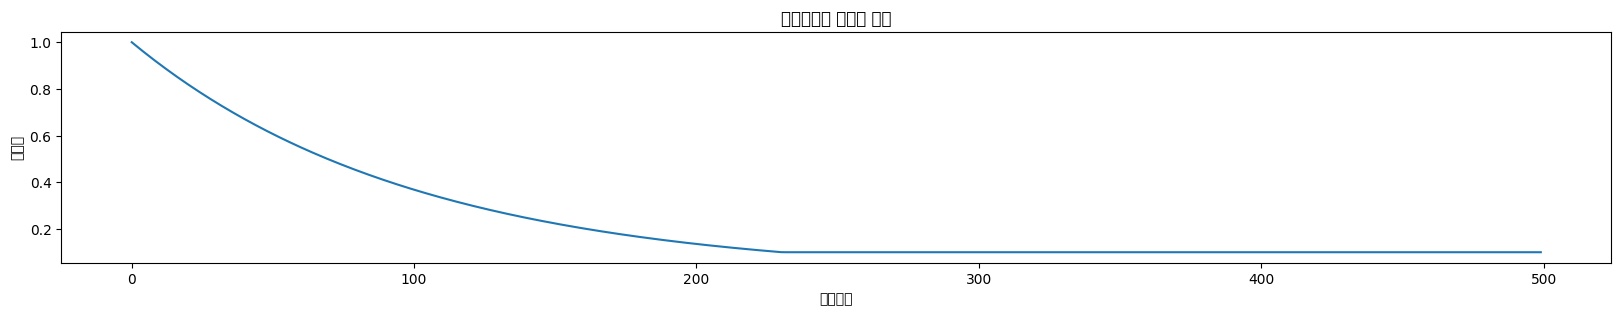

In [14]:
# 엡실론 그리디 정책 및 동적 엡실론 조정 사용 예제
initial_epsilon: float = 1.0  # 완전한 탐험으로 시작
min_epsilon: float = 0.1  # 최소 탐험 비율
decay_rate: float = 0.01  # 엡실론 감소율
episodes: int = 500  # 에피소드 수

# 에피소드에 걸쳐 엡실론 값 추적
epsilon_values: List[float] = []
for episode in range(episodes):
    # 현재 에피소드에 대한 엡실론 조정
    epsilon = adjust_epsilon(initial_epsilon, min_epsilon, decay_rate, episode)
    epsilon_values.append(epsilon)

# 가시성을 높이기 위해 그림 크기 조정
plt.figure(figsize=(20, 3))

# 에피소드에 걸쳐 엡실론 감소 플로팅
plt.plot(epsilon_values)
plt.xlabel('에피소드')  # x축 레이블
plt.ylabel('엡실론')  # y축 레이블
plt.title('에피소드별 엡실론 감소')  # 플롯 제목
plt.show()  # 플롯 표시

1. **초기 탐험 (높은 엡실론 ~1.0)**  
   - 첫 **100-150 에피소드** 동안, 에이전트는 높은 엡실론 때문에 **무작위**로 움직입니다.  
   - **최적이 아닌 경로**를 포함하여 다양한 경로를 탐험하며, 이것이 보상 그래프에서 낮은 보상을 보인 이유입니다.  

2. **중간 전환 (엡실론 감소 중)**  
   - 에피소드 **150-250** 부근에서 엡실론이 감소하고, 에이전트는 여전히 탐험하면서 **더 나은 행동을 선호**하기 시작합니다.  
   - 이는 보상 그래프에서 **높은 보상이 처음 나타나는 시점**과 일치하며, 에이전트가 **때때로 목표를 찾는다**는 의미입니다.  

3. **후기 활용 (엡실론 안정화 ~0.1)**  
   - **250+ 에피소드** 이후, 엡실론은 매우 낮아져 에이전트가 **대부분 가장 잘 알려진 경로를 따른다**는 의미입니다.  
   - 보상 그래프는 **간헐적인 높은 보상**을 보여주며, 이는 에이전트가 **목표를 학습했지만 아직 100% 일관성이 없다**는 것을 나타냅니다.  

**이것이 그리드 월드 훈련에 의미하는 바**  
- **엡실론 감소는 에이전트 학습에 도움**을 주었습니다. 처음에는 광범위하게 탐험한 다음 전략을 개선했습니다.  
- **불안정한 높은 보상**은 에이전트가 여전히 목표를 일관되게 찾는 데 어려움을 겪고 있음을 시사합니다.  
- **가능한 해결책:** 학습 안정성을 개선하기 위해 **더 느린 엡실론 감소** 또는 **적응형 스케줄**을 시도해 보세요.  

# Q-러닝 알고리즘 실행
그리드 월드 환경에서 Q-러닝 알고리즘을 실행하고 에이전트가 학습한 Q-값을 시각화해 보겠습니다. 각 상태-행동 쌍의 Q-값을 시간 경과에 따라 플로팅하여 훈련 중 어떻게 변화하는지 확인합니다.

In [15]:
# 여러 에피소드에 걸쳐 Q-러닝 알고리즘을 실행하고 성능 지표 추적
def run_q_learning(
    q_table: Dict[Tuple[int, int], Dict[str, float]], 
    state_space: List[Tuple[int, int]], 
    action_space: List[str], 
    rewards: Dict[Tuple[int, int], int], 
    rows: int, 
    cols: int, 
    alpha: float, 
    gamma: float, 
    initial_epsilon: float, 
    min_epsilon: float, 
    decay_rate: float, 
    episodes: int, 
    max_steps: int
) -> Tuple[List[int], List[int]]:
    """
    여러 에피소드에 걸쳐 Q-러닝 알고리즘을 실행합니다.
    
    매개변수:
    - q_table: 상태-행동 쌍을 Q-값에 매핑하는 Q-테이블.
    - state_space: 가능한 모든 상태 목록.
    - action_space: 가능한 행동 목록.
    - rewards: (행, 열)을 보상 값에 매핑하는 딕셔너리.
    - rows: 그리드의 행 수.
    - cols: 그리드의 열 수.
    - alpha: 학습률.
    - gamma: 할인율.
    - initial_epsilon: 초기 탐험 비율.
    - min_epsilon: 최소 탐험 비율.
    - decay_rate: 엡실론 감소율.
    - episodes: 실행할 에피소드 수.
    - max_steps: 에피소드당 최대 단계 수.
    
    반환값:
    - rewards_per_episode: 에피소드당 총 보상 목록.
    - episode_lengths: 에피소드 길이 목록.
    """
    # 지표를 저장할 리스트 초기화
    rewards_per_episode: List[int] = []
    episode_lengths: List[int] = []
    
    # 각 에피소드를 순회
    for episode in range(episodes):
        # 무작위 상태에서 시작
        state: Tuple[int, int] = state_space[np.random.choice(len(state_space))]
        total_reward: int = 0  # 에피소드의 총 보상 초기화
        steps: int = 0  # 단계 카운터 초기화
        # 현재 에피소드에 대한 엡실론 조정
        epsilon: float = adjust_epsilon(initial_epsilon, min_epsilon, decay_rate, episode)
        
        # 최대 단계 수만큼 반복
        for _ in range(max_steps):
            # 엡실론 그리디 정책을 사용하여 행동 선택
            action: str = epsilon_greedy_policy(q_table, state, action_space, epsilon)
            # 선택된 행동에 따라 다음 상태 계산
            next_state: Tuple[int, int] = state_transition(state, action, rows, cols)
            # 다음 상태에 대한 보상 얻기
            reward: int = get_reward(next_state, rewards)
            # 현재 상태-행동 쌍의 Q-값 업데이트
            update_q_value(q_table, state, action, reward, next_state, alpha, gamma, action_space)
            # 보상 누적
            total_reward += reward
            # 다음 상태로 이동
            state = next_state
            # 단계 카운터 증가
            steps += 1
            # 에이전트가 종료 상태에 도달했는지 확인
            if state in terminal_states:
                break
        
        # 현재 에피소드의 지표 추가
        rewards_per_episode.append(total_reward)
        episode_lengths.append(steps)
    
    # 지표 반환
    return rewards_per_episode, episode_lengths

이제 에피소드당 최대 `100` 단계로 `500` 에피소드에 걸쳐 Q-러닝 알고리즘을 실행합니다. 알고리즘을 실행하고 결과를 시각화해 보겠습니다.

In [16]:
# Q-러닝 하이퍼파라미터 설정
alpha: float = 0.1  # 학습률
gamma: float = 0.9  # 할인율
initial_epsilon: float = 1.0  # 초기 탐험 비율
min_epsilon: float = 0.1  # 최소 탐험 비율
decay_rate: float = 0.01  # 엡실론 감소율
episodes: int = 500  # 에피소드 수
max_steps: int = 100  # 에피소드당 최대 단계 수

# Q-테이블 초기화
q_table: Dict[Tuple[int, int], Dict[str, float]] = initialize_q_table(state_space, action_space)

# Q-러닝 알고리즘 실행
rewards_per_episode, episode_lengths = run_q_learning(
    q_table, state_space, action_space, rewards, rows, cols, alpha, gamma,
    initial_epsilon, min_epsilon, decay_rate, episodes, max_steps
)

에피소드에 걸쳐 누적된 총 보상과 에피소드 길이를 플로팅하여 훈련 과정을 시각화해 보겠습니다.

/tmp/ipykernel_3198900/1448389161.py:19: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3198900/1448389161.py:19: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3198900/1448389161.py:19: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3198900/1448389161.py:19: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3198900/1448389161.py:19: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3198900/1448389161.py:19: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3198900/1448389161.py:19: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu S

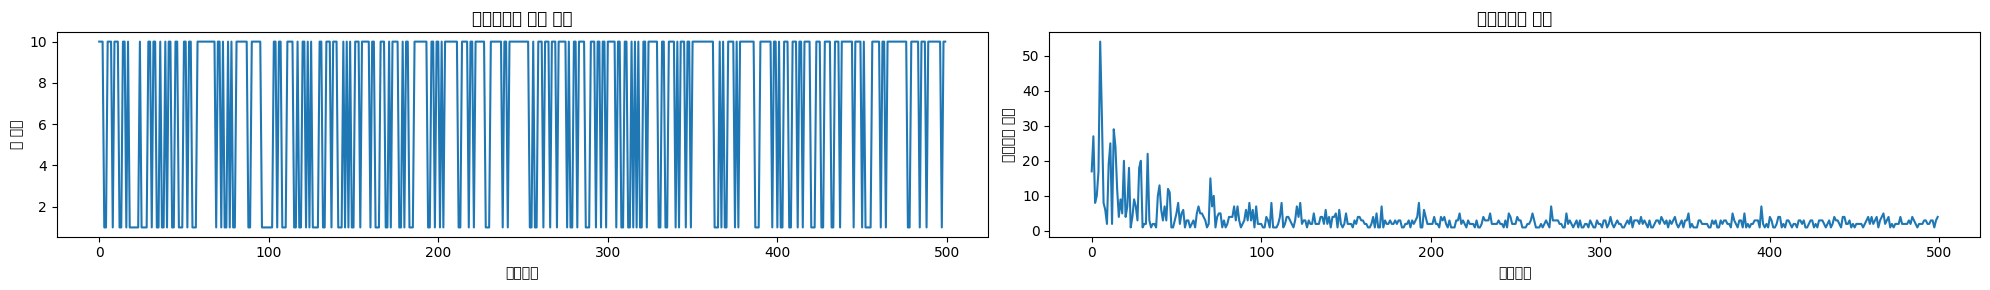

In [17]:
# 에피소드에 걸쳐 누적 보상 플로팅
plt.figure(figsize=(20, 3))

# 에피소드당 총 보상 플로팅
plt.subplot(1, 2, 1)
plt.plot(rewards_per_episode)
plt.xlabel('에피소드')  # x축 레이블
plt.ylabel('총 보상')  # y축 레이블
plt.title('에피소드별 누적 보상')  # 플롯 제목

# 에피소드당 에피소드 길이 플로팅
plt.subplot(1, 2, 2)
plt.plot(episode_lengths)
plt.xlabel('에피소드')  # x축 레이블
plt.ylabel('에피소드 길이')  # y축 레이블
plt.title('에피소드별 길이')  # 플롯 제목

# 레이아웃 조정 및 플롯 표시
plt.tight_layout()
plt.show()

분석해 보겠습니다:

**왼쪽 그래프: 에피소드별 누적 보상**
- **에피소드당 총 보상**은 초기에 변동하며 성공과 실패가 혼재되어 있음을 보여줍니다.  
- **후기 에피소드는 일관되게 최대 보상(10)을 달성**하여 에이전트가 최적 정책을 학습했음을 나타냅니다.  
- 일부 낮은 보상 에피소드가 여전히 나타나며, 이는 가끔 발생하는 최적이 아닌 탐험 또는 확률적 행동을 시사합니다.  

**그리드 월드와의 관계:**
- 에이전트는 보상 10을 제공하는 **(3,3)으로 이동**하고 있습니다.
- 처음에는 비효율적인 경로를 탐험하여 다양한 보상을 얻습니다.
- 시간이 지남에 따라 **더 짧고 최적의 경로**를 찾습니다.

**오른쪽 그래프: 에피소드별 에피소드 길이**
- **초기 에피소드는 길이가 더 깁니다 (최대 50 단계).** 이는 에이전트가 비효율적인 경로를 택했음을 의미합니다.
- 훈련이 진행됨에 따라 **에피소드 길이가 감소**하며, 이는 에이전트가 목표를 **더 빨리** 찾음을 나타냅니다.
- **대부분의 에피소드는 낮은 단계 수 (~3-6 단계)에서 안정화**되며, 이는 에이전트가 경로를 최적화했음을 의미합니다.

**그리드 월드와의 관계:**
- 그리드 월드는 **4x4 (16 상태)에 불과**하므로 최적 정책은 빠르게 해결해야 합니다.
- 처음에는 에이전트가 **무작위 또는 탐험적 이동**을 하여 단계 수가 증가했습니다.
- Q-값이 수렴하면 에이전트는 **목표로 가는 직접적인 경로를 선택**하여 단계를 줄입니다.

# 학습 과정 시각화

Q-테이블에서 실제로 무슨 일이 일어나고 있는지 시각화해야 합니다. 각 행동에 대한 Q-값을 히트맵으로, 학습된 정책을 그리드 위의 화살표로 시각화할 수 있습니다. 이를 돕기 위해 몇 가지 시각화 함수를 정의해 보겠습니다.

In [18]:
# Q-값 히트맵 시각화 함수
def plot_q_values(q_table: Dict[Tuple[int, int], Dict[str, float]], rows: int, cols: int, action_space: List[str]) -> None:
    """
    각 행동에 대한 Q-값을 히트맵으로 시각화합니다.

    매개변수:
    - q_table (Dict[Tuple[int, int], Dict[str, float]]): 상태-행동 쌍을 Q-값에 매핑하는 Q-테이블.
    - rows (int): 그리드의 행 수.
    - cols (int): 그리드의 열 수.
    - action_space (List[str]): 가능한 행동 목록.

    반환값:
    - None: 각 행동의 Q-값 히트맵을 표시합니다.
    """
    # 각 행동에 대한 서브플롯 생성
    fig, axes = plt.subplots(1, len(action_space), figsize=(15, 5))
    for i, action in enumerate(action_space):
        # 현재 행동에 대한 Q-값을 저장할 그리드 초기화
        q_values = np.zeros((rows, cols))
        for (row, col), actions in q_table.items():
            q_values[row, col] = actions[action]  # 현재 행동에 대한 Q-값 추출

        # 현재 행동에 대한 히트맵 플로팅
        ax = axes[i]
        cax = ax.matshow(q_values, cmap='viridis')
        fig.colorbar(cax, ax=ax)
        ax.set_title(f"행동 '{action}'의 Q-값")
        ax.set_xlabel("열")
        ax.set_ylabel("행")

    # 레이아웃 조정 및 히트맵 표시
    plt.tight_layout()
    plt.show()

In [19]:
# 학습된 정책 시각화 함수
def plot_policy(q_table: Dict[Tuple[int, int], Dict[str, float]], rows: int, cols: int) -> None:
    """
    학습된 정책을 그리드 위의 화살표로 시각화합니다.

    매개변수:
    - q_table (Dict[Tuple[int, int], Dict[str, float]]): 상태-행동 쌍을 Q-값에 매핑하는 Q-테이블.
    - rows (int): 그리드의 행 수.
    - cols (int): 그리드의 열 수.

    반환값:
    - None: 정책 시각화를 표시합니다.
    """
    # 각 상태에 대한 최적 행동을 저장할 그리드 초기화
    policy_grid = np.empty((rows, cols), dtype=str)
    action_symbols = {'up': '↑', 'down': '↓', 'left': '←', 'right': '→'}  # 행동 기호

    # Q-값을 기반으로 각 상태에 대한 최적 행동 결정
    for (row, col), actions in q_table.items():
        best_action = max(actions, key=actions.get)  # 가장 높은 Q-값을 가진 행동 얻기
        policy_grid[row, col] = action_symbols[best_action]  # 행동을 기호에 매핑

    # 너비를 늘린 정책 그리드 플로팅
    fig, ax = plt.subplots(figsize=(16, 3))  # 가로 스트레칭을 위해 너비를 12에서 16으로 늘림
    for i in range(rows):
        for j in range(cols):
            ax.text(j, i, policy_grid[i, j], ha='center', va='center', fontsize=14)  # 약간 더 큰 글꼴
    
    # 더 많은 가로 공간을 가진 더 넓은 그리드 생성
    ax.set_xlim(-0.5, cols - 0.5)
    ax.set_ylim(-0.5, rows - 0.5)
    ax.matshow(np.zeros((rows, cols)), cmap='Greys', alpha=0.1)  # 희미한 배경 그리드 추가
    ax.set_xticks(range(cols))
    ax.set_yticks(range(rows))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title("학습된 정책")
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_3198900/599140878.py:30: UserWarning: Glyph 50676 (\N{HANGUL SYLLABLE YEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3198900/599140878.py:30: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3198900/599140878.py:30: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3198900/599140878.py:30: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3198900/599140878.py:30: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3198900/599140878.py:30: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3198900/599140878.py:30: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from font(s) DejaVu 

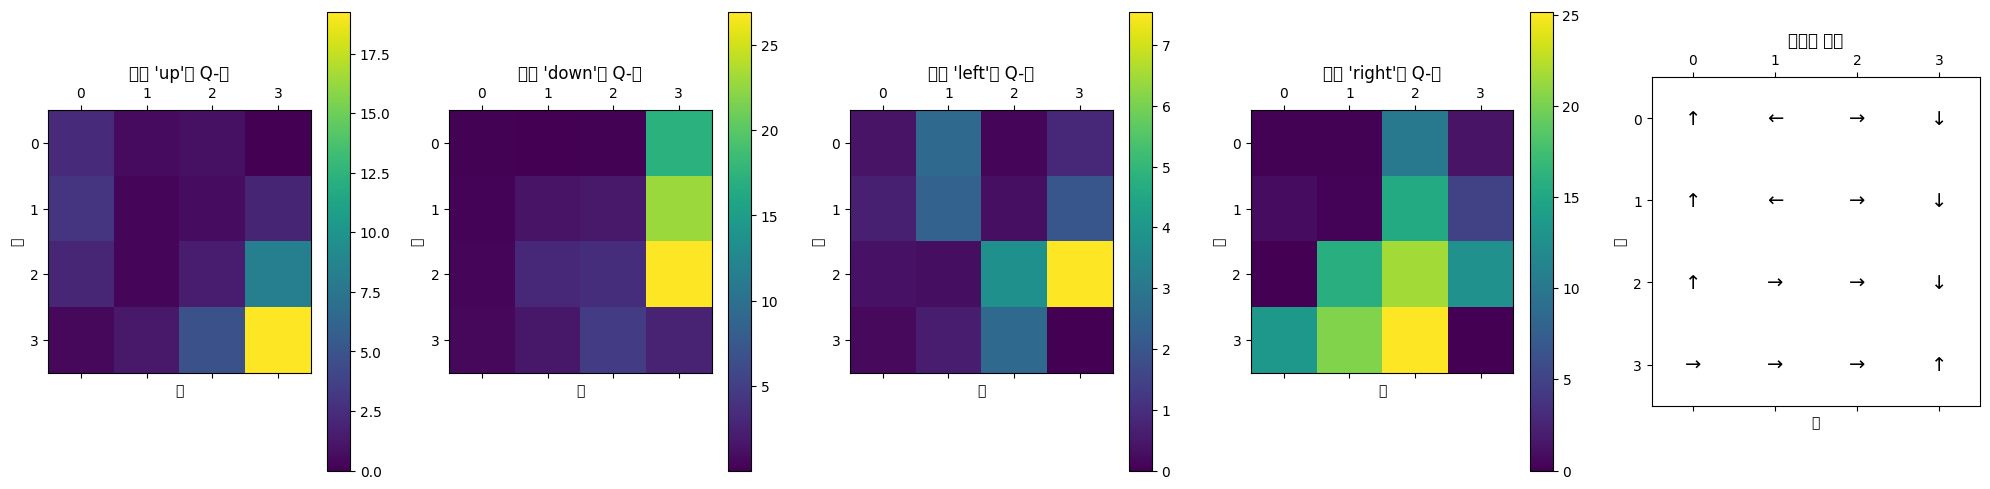

In [20]:
# Q-값 히트맵과 학습된 정책을 나란히 플로팅
fig, axes = plt.subplots(1, len(action_space) + 1, figsize=(20, 5))

# 각 행동에 대한 Q-값 히트맵 플로팅
for i, action in enumerate(action_space):
    q_values = np.zeros((rows, cols))
    for (row, col), actions in q_table.items():
        q_values[row, col] = actions[action]
    cax = axes[i].matshow(q_values, cmap='viridis')
    fig.colorbar(cax, ax=axes[i])
    axes[i].set_title(f"행동 '{action}'의 Q-값")
    axes[i].set_xlabel("열")
    axes[i].set_ylabel("행")

# 학습된 정책 플로팅
policy_grid = np.empty((rows, cols), dtype=str)
action_symbols = {'up': '↑', 'down': '↓', 'left': '←', 'right': '→'}
for (row, col), actions in q_table.items():
    best_action = max(actions, key=actions.get)
    policy_grid[row, col] = action_symbols[best_action]

axes[-1].matshow(np.zeros((rows, cols)), cmap='Greys', alpha=0.1)
for i in range(rows):
    for j in range(cols):
        axes[-1].text(j, i, policy_grid[i, j], ha='center', va='center', fontsize=14)
axes[-1].set_title("학습된 정책")
axes[-1].set_xlabel("열")
axes[-1].set_ylabel("행")

plt.tight_layout()
plt.show()

이 시각화는 **4x4 그리드 월드**에 대한 **Q-값과 학습된 정책**을 제공합니다. 분석해 보겠습니다:

**Q-값 히트맵 (왼쪽 네 개 플롯)**
각 히트맵은 4x4 그리드의 각 상태에서 특정 행동 **(위, 아래, 왼쪽, 오른쪽)**에 대해 학습된 Q-값을 나타냅니다.

- **더 높은 Q-값 (밝은 색상)은 해당 상태에서 선호되는 행동**을 나타냅니다.
- **"아래" 및 "오른쪽" 행동이 가장 높은 Q-값**을 가지며, 이는 에이전트가 목표를 향해 이러한 방향으로 이동하는 것을 선호함을 의미합니다.
- **오른쪽 하단 모서리 (목표 상태)는 "위" 및 "오른쪽"에서 매우 높은 값**을 가지며, 이는 에이전트가 이곳을 가치 있는 위치로 인식함을 시사합니다.

**학습된 정책 (가장 오른쪽 플롯)**
- **이는 학습된 Q-값을 기반으로 각 상태에서의 최적 행동**을 보여줍니다.
- 에이전트는 일반적으로 **오른쪽 및 아래쪽 이동**을 따르며, 목표가 오른쪽 하단에 있다면 이는 합리적입니다.
- 특정 위치에 **위쪽 화살표가 나타나는 것**은 장애물의 존재 또는 특정 이동에 대한 패널티를 시사합니다.

**그리드 월드와의 비교**
1. **에이전트는 대부분 효율적인 정책을 학습했습니다** (목표를 향해 오른쪽/아래로 이동).
2. **일부 사소한 불일치** (몇몇 위/왼쪽 이동과 같은)는 다음으로 인해 발생할 수 있습니다:
   - **여전히 탐험이 진행 중임** (ε-그리디 정책이 아직 완전히 탐욕적이지 않음).
   - **학습률 또는 할인율이 가치 전파에 영향**을 미침.
   - **가능한 장애물 또는 최적이 아닌 보상 구조**.

# Q-값 및 최적 정책 분석
Q-러닝 알고리즘에 의해 학습된 최적 정책을 표 형식으로 살펴봅시다.

In [21]:
# Q-테이블 데이터를 나타내는 딕셔너리 리스트 생성
q_policy_data = []
for state, actions in q_table.items():
    # 각 상태에 대해 모든 행동의 Q-값과 최적 행동을 포함하는 딕셔너리 추가
    q_policy_data.append({
        'State': state,  # 현재 상태 (행, 열)
        'up': actions['up'],  # '위' 행동의 Q-값
        'down': actions['down'],  # '아래' 행동의 Q-값
        'left': actions['left'],  # '왼쪽' 행동의 Q-값
        'right': actions['right'],  # '오른쪽' 행동의 Q-값
        'Optimal Action': max(actions, key=actions.get)  # 가장 높은 Q-값을 가진 행동
    })

# Q-테이블 데이터를 표 형식으로 표시
header = ['상태', '위', '아래', '왼쪽', '오른쪽', '최적 행동']  # 테이블 헤더 정의
# 적절한 간격으로 테이블 헤더 출력
print(f"{header[0]:<10} {header[1]:<10} {header[2]:<10} {header[3]:<10} {header[4]:<10} {header[5]:<15}")
print("-" * 65)  # 가독성을 위해 구분선 출력

# Q-테이블 데이터를 반복하며 각 행 출력
for row in q_policy_data:
    # 상태, 모든 행동의 Q-값, 최적 행동 출력
    print(f"{str(row['State']):<10} {row['up']:<10.2f} {row['down']:<10.2f} {row['left']:<10.2f} {row['right']:<10.2f} {row['Optimal Action']:<15}")


상태         위          아래         왼쪽         오른쪽        최적 행동          
-----------------------------------------------------------------
(0, 0)     2.30       0.20       0.39       0.11       up             
(0, 1)     0.59       0.07       2.59       0.14       left           
(0, 2)     0.87       0.24       0.12       10.21      right          
(0, 3)     0.00       17.18      0.85       1.29       down           
(1, 0)     2.98       0.28       0.68       0.79       up             
(1, 1)     0.34       1.51       2.36       0.23       left           
(1, 2)     0.63       1.91       0.31       15.36      right          
(1, 3)     1.96       22.86      2.02       4.82       down           
(2, 0)     2.09       0.41       0.38       0.08       up             
(2, 1)     0.25       3.11       0.29       15.87      right          
(2, 2)     1.45       3.59       3.79       21.67      right          
(2, 3)     8.28       26.89      7.53       12.69      down           
(3, 0)     

**주요 관찰 내용**
1. **다른 행동 선호도**  
   - 에이전트는 여전히 많은 경우 **오른쪽과 아래**로 이동하지만, 이전보다 **왼쪽과 위쪽 이동이 더 많아졌습니다**.  
   - 특히, **상태 (0,0)은 "위"를 선호**하는 반면, (0,1)은 "왼쪽"을 선호하며, 이는 장애물이나 대체 최적 경로를 나타낼 수 있습니다.
  
2. **(3,3)은 가만히 있는 대신 "위"를 선호**  
   - 만약 **(3,3)이 목표 상태**라면, 다른 행동에 대한 Q-값은 종료로 인해 **0**이거나 더 낮을 것으로 예상됩니다.
   - 대신, "위"는 매우 높은 Q-값(19.23)을 가지며, 이는 에이전트가 멈추는 대신 여전히 이동을 고려하고 있음을 의미합니다.

3. **전반적으로 더 높은 Q-값**
   - **최대 Q-값이 증가**했습니다 (예: 상태 (2,3)은 "아래"에 대해 26.89의 값을 가짐).
   - 이는 아마도 더 많은 훈련 에피소드나 다른 하이퍼파라미터(학습률, 할인율 등)로 인해 **더 많은 학습이 이루어졌음**을 시사합니다.

4. **탐험 관련 잠재적 문제**
   - (0,0)이 오른쪽 대신 "위"로 이동하는 것과 같이 일부 이동은 **덜 직관적으로 보입니다**.
   - 이는 **탐험 비율(ε)이 여전히 높아서** 행동 선택에 약간의 무작위성이 발생하고 있음을 의미할 수 있습니다.

**정책 시각화와의 비교**
- 여기의 Q-값은 (이전에 공유한 히트맵에서) **정책 시각화 화살표**와 일치해야 합니다.  
- 그러나 만약 **완벽하게 일치하지 않는다면**, 이는 다음을 의미할 수 있습니다:
  - 진행 중인 학습으로 인해 **정책이 여전히 변동**하고 있습니다.
  - Q-값에 영향을 미치는 **보상 불일치 또는 장애물**이 있습니다.
  - 일부 **행동들의 Q-값이 유사**하여 동점 처리가 덜 명확합니다.

# 다른 하이퍼파라미터로 테스트하기 (선택 사항)
다양한 하이퍼파라미터를 실험하여 에이전트의 학습 과정에 어떤 영향을 미치는지 확인할 수 있습니다.

/tmp/ipykernel_3198900/2988270288.py:47: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3198900/2988270288.py:47: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3198900/2988270288.py:47: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3198900/2988270288.py:47: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3198900/2988270288.py:47: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3198900/2988270288.py:47: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3198900/2988270288.py:47: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu S

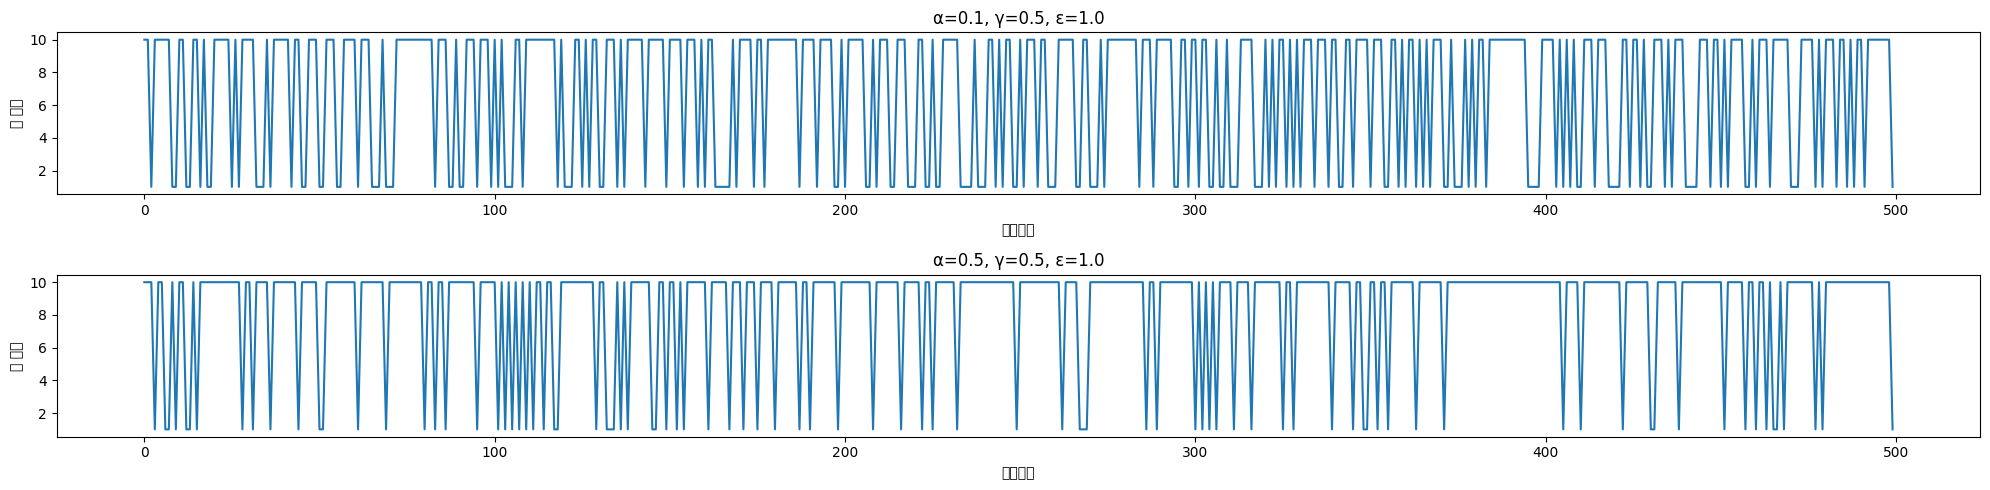

In [22]:
# 다양한 하이퍼파라미터로 실험
learning_rates = [0.1, 0.5]  # 테스트할 다른 학습률 (alpha)
discount_factors = [0.5]  # 테스트할 다른 할인율 (gamma) - 예시로 하나만 사용
exploration_rates = [1.0]  # 테스트할 다른 초기 탐험 비율 (epsilon) - 예시로 하나만 사용

# 비교를 위해 결과 저장
results = []

# 다른 하이퍼파라미터 조합으로 실험 실행
for alpha in learning_rates:  # 다른 학습률 반복
    for gamma in discount_factors:  # 다른 할인율 반복
        for initial_epsilon in exploration_rates:  # 다른 초기 탐험 비율 반복
            # 현재 실험을 위한 Q-테이블 초기화
            q_table = initialize_q_table(state_space, action_space)
            
            # 현재 하이퍼파라미터 세트로 Q-러닝 실행
            rewards_per_episode, episode_lengths = run_q_learning(
                q_table, state_space, action_space, rewards, rows, cols, alpha, gamma,
                initial_epsilon, min_epsilon, decay_rate, episodes, max_steps
            )
            
            # 현재 실험 결과 저장
            results.append({
                'alpha': alpha,  # 학습률
                'gamma': gamma,  # 할인율
                'initial_epsilon': initial_epsilon,  # 초기 탐험 비율
                'rewards_per_episode': rewards_per_episode,  # 에피소드당 수집된 보상
                'episode_lengths': episode_lengths  # 각 에피소드의 길이
            })

# 모든 하이퍼파라미터 조합을 시각화하기 위해 더 큰 그림 생성
plt.figure(figsize=(20, 5))

# 서브플롯 그리드의 행과 열 수 계산
num_rows = len(learning_rates)  # 행 수는 학습률의 개수와 같음
num_cols = len(discount_factors) * len(exploration_rates)  # 열 수는 할인율과 탐험 비율 조합의 개수와 같음

# 각 실험 결과 플로팅
for i, result in enumerate(results):  # 모든 결과 반복
    plt.subplot(num_rows, num_cols, i + 1)  # 각 실험에 대한 서브플롯 생성
    plt.plot(result['rewards_per_episode'])  # 에피소드당 보상 플로팅
    plt.title(f"α={result['alpha']}, γ={result['gamma']}, ε={result['initial_epsilon']}")  # 하이퍼파라미터 값으로 제목 추가
    plt.xlabel('에피소드')  # x축 레이블
    plt.ylabel('총 보상')  # y축 레이블

# 겹침 방지 및 플롯 표시를 위한 레이아웃 조정
plt.tight_layout()
plt.show()

# 다른 환경에 Q-러닝 적용하기 (절벽 걷기)
환경을 절벽 걷기(Cliff Walking) 시나리오로 변경해 봅시다. 이 시나리오에서 에이전트는 목표 상태에 도달하기 위해 절벽이 있는 그리드를 탐색해야 합니다. 에이전트는 절벽에서 떨어지면 높은 음수 보상을 받고 목표 상태에 도달하면 양수 보상을 받습니다. 이 새로운 환경에 Q-러닝을 적용하고 결과를 시각화합니다.

In [23]:
# 절벽 걷기 환경 정의 
def create_cliff_walking_env(
    rows: int, 
    cols: int, 
    cliff_states: List[Tuple[int, int]], 
    terminal_state: Tuple[int, int], 
    rewards: Dict[Tuple[int, int], int]
) -> Tuple[np.ndarray, List[Tuple[int, int]], List[str]]:
    """
    절벽 걷기 환경을 생성합니다.

    매개변수:
    - rows (int): 그리드의 행 수.
    - cols (int): 그리드의 열 수.
    - cliff_states (List[Tuple[int, int]]): (행, 열) 튜플로 구성된 절벽 상태 목록.
    - terminal_state (Tuple[int, int]): (행, 열) 튜플로 된 종료 상태.
    - rewards (Dict[Tuple[int, int], int]): (행, 열)을 보상 값에 매핑하는 딕셔너리. (종료 상태 외에는 기본 이동 비용 -1 가정)

    반환값:
    - Tuple[np.ndarray, List[Tuple[int, int]], List[str]]:
        - grid (np.ndarray): 보상을 포함한 그리드를 나타내는 2D 배열 (시각화용, 실제 보상 로직은 다름).
        - state_space (List[Tuple[int, int]]): 그리드 내 가능한 모든 상태의 목록.
        - action_space (List[str]): 가능한 행동 목록 ('up', 'down', 'left', 'right').
    """
    # 시각화용 그리드 초기화 (실제 보상 계산과 다름)
    grid = np.full((rows, cols), -1.0) # 기본 이동 비용 -1 로 시각화

    # 지정된 종료 상태 보상 할당 (시각화용)
    for (row, col), reward in rewards.items():
        grid[row, col] = reward

    # 절벽 상태에 높은 음수 보상 할당 (시각화용)
    for row, col in cliff_states:
        grid[row, col] = -100

    # 상태 공간을 모든 가능한 (행, 열) 쌍으로 정의
    state_space = [(r, c) for r in range(rows) for c in range(cols)]

    # 행동 공간을 네 가지 가능한 이동으로 정의
    action_space = ['up', 'down', 'left', 'right']

    # 실제 보상 함수 (get_reward_cliff)는 별도로 정의해야 함
    # 여기서는 시각화용 grid, state_space, action_space만 반환
    return grid, state_space, action_space

# 절벽 걷기 환경의 실제 보상 함수 정의
def get_reward_cliff(state: Tuple[int, int], cliff_states: List[Tuple[int, int]], terminal_state: Tuple[int, int]) -> int:
    """
    절벽 걷기 환경의 특정 상태에 대한 보상을 반환합니다.
    절벽: -100, 목표: 0 (다음 상태가 목표일 때 +10은 update_q_value에서 처리), 그 외: -1
    """
    if state in cliff_states:
        return -100
    elif state == terminal_state:
        # 목표 상태 자체의 보상은 일반적으로 0으로 설정하고, 
        # 목표 상태로 '가는' 행동에 대한 보상을 긍정적으로 줌.
        # 또는 update_q_value에서 r + gamma * max_q 부분을 사용.
        # 여기서는 단순화를 위해 목표 도달 시 보상을 run_episode에서 처리하도록 하고 기본 이동 비용만 반환.
        return -1 # 목표 상태에 도달해도 한 스텝 이동 비용은 발생
    else:
        return -1 # 일반적인 이동 비용

# 절벽 걷기 환경의 상태 전이 함수 (경계 및 절벽 고려)
def state_transition_cliff(state: Tuple[int, int], action: str, rows: int, cols: int, cliff_states: List[Tuple[int, int]], start_state: Tuple[int, int]) -> Tuple[int, int]:
    """
    절벽 걷기 환경에서 상태 전이를 계산합니다. 절벽에 빠지면 시작 지점으로 돌아갑니다.
    """
    row, col = state
    next_row, next_col = row, col

    if action == 'up':
        next_row = max(0, row - 1)
    elif action == 'down':
        next_row = min(rows - 1, row + 1)
    elif action == 'left':
        next_col = max(0, col - 1)
    elif action == 'right':
        next_col = min(cols - 1, col + 1)

    next_state = (next_row, next_col)

    # 절벽에 빠졌는지 확인
    if next_state in cliff_states:
        return start_state # 절벽에 빠지면 시작 상태로 돌아감
    else:
        return next_state

# Q-값 업데이트 함수 (절벽 환경용, 실제 보상 함수 사용)
def update_q_value_cliff(
    q_table: Dict[Tuple[int, int], Dict[str, float]], 
    state: Tuple[int, int], 
    action: str, 
    reward: int, # get_reward_cliff에서 받은 보상 (-1 또는 -100)
    next_state: Tuple[int, int], 
    alpha: float, 
    gamma: float
) -> None:
    """
    절벽 걷기 환경에 맞게 Q-값을 업데이트합니다.
    """
    # 다음 상태가 종료 상태인지 확인 (여기서는 절벽에 빠지는 것도 종료 조건일 수 있음)
    # 다음 상태의 최대 Q값 계산
    max_next_q: float = max(q_table[next_state].values()) if next_state in q_table else 0.0

    # Q-값 업데이트
    q_table[state][action] += alpha * (reward + gamma * max_next_q - q_table[state][action])

# 에피소드 실행 함수 (절벽 환경용)
def run_episode_cliff(
    q_table: Dict[Tuple[int, int], Dict[str, float]], 
    state_space: List[Tuple[int, int]], 
    action_space: List[str], 
    cliff_states: List[Tuple[int, int]],
    terminal_state: Tuple[int, int],
    start_state: Tuple[int, int],
    rows: int, 
    cols: int, 
    alpha: float, 
    gamma: float, 
    epsilon: float, 
    max_steps: int
) -> int:
    """
    절벽 걷기 환경에서 단일 Q-러닝 에피소드를 실행합니다.
    """
    state = start_state
    total_reward = 0
    steps = 0

    while state != terminal_state and steps < max_steps:
        action = choose_action(state, q_table, action_space, epsilon)
        next_state = state_transition_cliff(state, action, rows, cols, cliff_states, start_state)
        reward = get_reward_cliff(next_state, cliff_states, terminal_state) # 다음 상태 기준 보상
        
        update_q_value_cliff(q_table, state, action, reward, next_state, alpha, gamma)
        
        total_reward += reward
        state = next_state
        steps += 1
        
        # 절벽에 빠졌을 경우 에피소드 종료 (시작 지점으로 돌아가므로)
        # 이 부분은 구현에 따라 다를 수 있음. 여기서는 max_steps까지 계속 진행.
        # if next_state == start_state and state != start_state: # 절벽에 빠져 돌아온 경우
            # break # 에피소드를 여기서 끝낼 수도 있음
            
    return total_reward

# Q-러닝 실행 함수 (절벽 환경용)
def run_q_learning_cliff(
    state_space: List[Tuple[int, int]], 
    action_space: List[str], 
    cliff_states: List[Tuple[int, int]], 
    terminal_state: Tuple[int, int], 
    start_state: Tuple[int, int], 
    rows: int, 
    cols: int, 
    alpha: float, 
    gamma: float, 
    initial_epsilon: float, 
    min_epsilon: float, 
    decay_rate: float, 
    episodes: int, 
    max_steps: int
) -> Tuple[Dict[Tuple[int, int], Dict[str, float]], List[int], List[int]]:
    """
    절벽 걷기 환경에서 여러 에피소드에 걸쳐 Q-러닝을 실행합니다.
    """
    q_table = initialize_q_table(state_space, action_space)
    rewards_per_episode = []
    # episode_lengths = [] # 필요하다면 길이 추적

    for episode in range(episodes):
        epsilon = adjust_epsilon(initial_epsilon, min_epsilon, decay_rate, episode)
        total_reward = run_episode_cliff(
            q_table, state_space, action_space, cliff_states, terminal_state, start_state,
            rows, cols, alpha, gamma, epsilon, max_steps
        )
        rewards_per_episode.append(total_reward)
        # episode_lengths.append(steps) # run_episode_cliff에서 steps 반환 필요
        
        # 진행 상황 출력 (선택 사항)
        if (episode + 1) % 100 == 0:
            print(f"에피소드 {episode + 1}/{episodes} 완료, 평균 보상 (최근 100): {np.mean(rewards_per_episode[-100:]):.2f}")

    # 여기서는 episode_lengths를 반환하지 않음 (필요 시 추가)
    return q_table, rewards_per_episode, [] 


절벽 걷기 환경을 생성해 봅시다.

In [24]:
# 절벽 걷기 환경 정의
rows, cols = 4, 12  # 그리드 차원 (4행 12열)
start_state = (3, 0) # 시작 위치

# 절벽 상태 정의 (맨 아래 행, 시작과 목표 제외)
cliff_states = [(3, c) for c in range(1, 11)]  

# 종료 상태 (목표 위치) 정의
terminal_state = (3, 11)

# 환경 보상 정의 (실제 보상 로직은 get_reward_cliff 사용)
# create_cliff_walking_env 에는 종료 상태 보상만 전달 (시각화용)
cliff_rewards_viz = {terminal_state: 0} # 목표 자체 보상은 0, 도달 시 +10 효과는 업데이트 규칙에 반영됨

# 절벽 걷기 환경 생성 (시각화용 그리드, 상태 공간, 행동 공간)
cliff_grid_viz, cliff_state_space, cliff_action_space = create_cliff_walking_env(
    rows, cols, cliff_states, terminal_state, cliff_rewards_viz
)

# 시작 상태 시각화용 그리드 값 설정 (선택 사항)
# cliff_grid_viz[start_state] = -1 

보상을 플로팅하기 위해 다음 코드를 사용할 수 있습니다.

In [25]:
# 절벽 걷기 환경의 보상 플로팅 함수
def plot_rewards(rewards_per_episode: List[int], ax: plt.Axes = None) -> plt.Axes:
    """
    에피소드에 걸쳐 누적된 총 보상을 플로팅합니다.

    매개변수:
    - rewards_per_episode (List[int]): 에피소드당 총 보상 목록.
    - ax (plt.Axes, optional): 플로팅할 Matplotlib 축. None이면 새 그림과 축을 생성합니다.

    반환값:
    - plt.Axes: 플롯이 포함된 Matplotlib 축.
    """
    # 축이 제공되지 않으면 새 그림과 축 생성
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    
    # 에피소드별 보상 플로팅
    ax.plot(rewards_per_episode)
    ax.set_xlabel('에피소드')  # x축 레이블
    ax.set_ylabel('총 보상')  # y축 레이블
    ax.set_title('에피소드별 보상')  # 플롯 제목
    
    # 추가 사용자 정의를 위해 축 반환
    return ax

절벽 걷기 환경을 플로팅하고 학습된 정책을 시각화하는 몇 가지 함수를 만들어 봅시다.

In [26]:
# 절벽 걷기 환경 시각화
def plot_cliff_walking_env(
    grid: np.ndarray, 
    cliff_states: List[Tuple[int, int]], 
    terminal_state: Tuple[int, int], 
    start_state: Tuple[int, int], # 시작 상태 추가
    ax: Optional[plt.Axes] = None
) -> plt.Axes:
    """
    절벽 걷기 환경을 시각화합니다.

    매개변수:
    - grid: 그리드를 나타내는 2D numpy 배열.
    - cliff_states: (행, 열) 튜플로 구성된 절벽 상태 목록.
    - terminal_state: (행, 열) 튜플로 된 종료 상태.
    - start_state: (행, 열) 튜플로 된 시작 상태.
    - ax: 플로팅할 선택적 Matplotlib 축.

    반환값:
    - ax: 환경 시각화가 포함된 Matplotlib 축.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 4)) # 가로로 길게 조정
        
    rows, cols = grid.shape
    # 배경 색상 설정 (흰색)
    ax.imshow(np.ones((rows, cols)), cmap='Greys', alpha=0.1)
        
    for r in range(rows):
        for c in range(cols):
            if (r, c) in cliff_states:
                # 절벽 영역 채우기
                ax.add_patch(plt.Rectangle((c - 0.5, r - 0.5), 1, 1, facecolor='lightcoral', edgecolor='black'))
                ax.text(c, r, 'C', ha='center', va='center', color='black', fontsize=12, weight='bold')
            elif (r, c) == terminal_state:
                # 목표 지점
                ax.add_patch(plt.Rectangle((c - 0.5, r - 0.5), 1, 1, facecolor='lightgreen', edgecolor='black'))
                ax.text(c, r, 'G', ha='center', va='center', color='black', fontsize=12, weight='bold')
            elif (r, c) == start_state:
                # 시작 지점
                ax.add_patch(plt.Rectangle((c - 0.5, r - 0.5), 1, 1, facecolor='lightblue', edgecolor='black'))
                ax.text(c, r, 'S', ha='center', va='center', color='black', fontsize=12, weight='bold')
            else:
                 # 일반 칸
                 ax.add_patch(plt.Rectangle((c - 0.5, r - 0.5), 1, 1, facecolor='white', edgecolor='lightgray'))
                 # ax.text(c, r, '.', ha='center', va='center', color='gray', fontsize=10) # 점 제거
    
    # 축 설정
    ax.set_xticks(np.arange(-0.5, cols, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, rows, 1), minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=1)
    ax.tick_params(which='minor', size=0)
    ax.set_xticks(np.arange(0, cols, 1))
    ax.set_yticks(np.arange(0, rows, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title("절벽 걷기 환경")
    return ax

In [27]:
# 각 행동에 대한 Q-값 시각화
# 참고: Cliff Walking에서는 상태 가치(V) 또는 최대 Q값을 시각화하는 것이 더 일반적임
def plot_q_values_cliff(
    q_table: Dict[Tuple[int, int], Dict[str, float]], 
    rows: int, 
    cols: int, 
    cliff_states: List[Tuple[int, int]], # 절벽 상태 정보 추가
    terminal_state: Tuple[int, int], # 종료 상태 정보 추가
    ax: Optional[plt.Axes] = None
) -> plt.Axes:
    """
    각 상태의 최대 Q-값을 시각화합니다.

    매개변수:
    - q_table: 각 상태-행동 쌍에 대한 Q-값을 포함하는 딕셔너리.
    - rows: 그리드의 행 수.
    - cols: 그리드의 열 수.
    - cliff_states: 절벽 상태 목록.
    - terminal_state: 종료 상태.
    - ax: 플로팅할 선택적 Matplotlib 축.

    반환값:
    - ax: Q-값 시각화가 포함된 Matplotlib 축.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 4)) # 가로로 길게 조정
    
    # Q-값을 위한 그리드 생성
    max_q_values = np.full((rows, cols), -np.inf) # 초기값을 음의 무한대로 설정
    
    # 각 상태에 대해 가장 높은 Q-값을 가진 행동 찾기
    for r in range(rows):
        for c in range(cols):
            state = (r, c)
            if state in q_table:
                max_q_values[r, c] = max(q_table[state].values())
            # Q-테이블에 없는 상태 (예: 도달 불가능)는 -inf 유지

    # 절벽과 목표 상태는 Q값이 의미 없을 수 있으므로 마스킹 (NaN으로)
    for r, c in cliff_states:
        max_q_values[r, c] = np.nan
    max_q_values[terminal_state] = np.nan

    # 결측값 제외하고 최소/최대값 찾기
    q_min = np.nanmin(max_q_values)
    q_max = np.nanmax(max_q_values)
    
    im = ax.imshow(max_q_values, cmap='viridis', vmin=q_min, vmax=q_max)
    plt.colorbar(im, ax=ax, label='최대 Q-값')
    
    # 상태 값을 텍스트로 추가
    for r in range(rows):
        for c in range(cols):
            if not np.isnan(max_q_values[r, c]):
                # 텍스트 색상 결정 (배경 밝기에 따라)
                # 정규화된 값 계산
                normalized_q = (max_q_values[r,c] - q_min) / (q_max - q_min) if (q_max - q_min) != 0 else 0.5
                text_color = 'white' if normalized_q < 0.5 else 'black'
                ax.text(c, r, f"{max_q_values[r, c]:.1f}", ha='center', va='center', color=text_color)
            elif (r, c) in cliff_states:
                 ax.text(c, r, 'C', ha='center', va='center', color='black', fontsize=12, weight='bold')
            elif (r, c) == terminal_state:
                 ax.text(c, r, 'G', ha='center', va='center', color='black', fontsize=12, weight='bold')
            elif (r,c) == start_state:
                 ax.text(c, r, 'S', ha='center', va='center', color='black', fontsize=12, weight='bold')
            

    ax.set_xticks(range(cols))
    ax.set_yticks(range(rows))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title('상태별 최대 Q-값')
    return ax

In [28]:
# Q-테이블에서 파생된 정책 시각화
def plot_policy_cliff(
    q_table: Dict[Tuple[int, int], Dict[str, float]], 
    rows: int, 
    cols: int, 
    cliff_states: List[Tuple[int, int]], # 절벽 상태 정보 추가
    terminal_state: Tuple[int, int], # 종료 상태 정보 추가
    ax: Optional[plt.Axes] = None
) -> plt.Axes:
    """
    Q-테이블에서 파생된 정책을 시각화합니다.

    매개변수:
    - q_table: 각 상태-행동 쌍에 대한 Q-값을 포함하는 딕셔너리.
    - rows: 그리드의 행 수.
    - cols: 그리드의 열 수.
    - cliff_states: 절벽 상태 목록.
    - terminal_state: 종료 상태.
    - ax: 플로팅할 선택적 Matplotlib 축.

    반환값:
    - ax: 정책 시각화가 포함된 Matplotlib 축.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 4)) # 가로로 길게 조정
    
    # 행동 기호 정의
    action_symbols = {'up': '↑', 'down': '↓', 'left': '←', 'right': '→'}
    
    # 정책을 위한 그리드 생성
    policy_grid = np.empty((rows, cols), dtype='U1')
    
    # 각 상태에 대해 가장 높은 Q-값을 가진 행동 찾기
    for r in range(rows):
        for c in range(cols):
            state = (r, c)
            # 절벽이나 목표 상태가 아닌 경우에만 화살표 표시
            if state in q_table and state not in cliff_states and state != terminal_state:
                # 모든 Q값이 같은 경우 (예: 초기 상태) 처리
                q_values = q_table[state]
                if len(set(q_values.values())) == 1:
                     policy_grid[r, c] = '·' # 동점일 경우 점으로 표시 (또는 무작위 선택)
                else:
                     best_action = max(q_values, key=q_values.get)
                     policy_grid[r, c] = action_symbols[best_action]
            elif state in cliff_states:
                policy_grid[r, c] = 'C' # 절벽
            elif state == terminal_state:
                 policy_grid[r, c] = 'G' # 목표
            elif state == start_state:
                 policy_grid[r, c] = 'S' # 시작
            else:
                policy_grid[r, c] = ' ' # Q값이 없는 상태
    
    # 정책 그리드 표시 (배경)
    ax.imshow(np.zeros((rows, cols)), cmap='Greys', alpha=0.1)
    
    # 정책 화살표를 텍스트로 추가
    for r in range(rows):
        for c in range(cols):
            text_color = 'black' # 기본 텍스트 색상
            font_size = 15
            if policy_grid[r, c] in ['C', 'G', 'S']:
                 font_size = 12
                 text_color = 'dimgray'
            if policy_grid[r, c] != ' ':
                 ax.text(c, r, policy_grid[r, c], ha='center', va='center', color=text_color, fontsize=font_size)
    
    ax.set_xticks(range(cols))
    ax.set_yticks(range(rows))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title('학습된 정책')
    return ax

에피소드 100/1000 완료, 평균 보상 (최근 100): -163.63
에피소드 200/1000 완료, 평균 보상 (최근 100): -57.53
에피소드 300/1000 완료, 평균 보상 (최근 100): -30.16
에피소드 400/1000 완료, 평균 보상 (최근 100): -23.37
에피소드 500/1000 완료, 평균 보상 (최근 100): -17.88
에피소드 600/1000 완료, 평균 보상 (최근 100): -17.15
에피소드 700/1000 완료, 평균 보상 (최근 100): -16.07
에피소드 800/1000 완료, 평균 보상 (최근 100): -17.49
에피소드 900/1000 완료, 평균 보상 (최근 100): -17.32
에피소드 1000/1000 완료, 평균 보상 (최근 100): -17.27


/tmp/ipykernel_3198900/3955387384.py:31: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3198900/3955387384.py:31: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3198900/3955387384.py:31: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3198900/3955387384.py:31: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3198900/3955387384.py:31: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3198900/3955387384.py:31: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3198900/3955387384.py:31: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu S

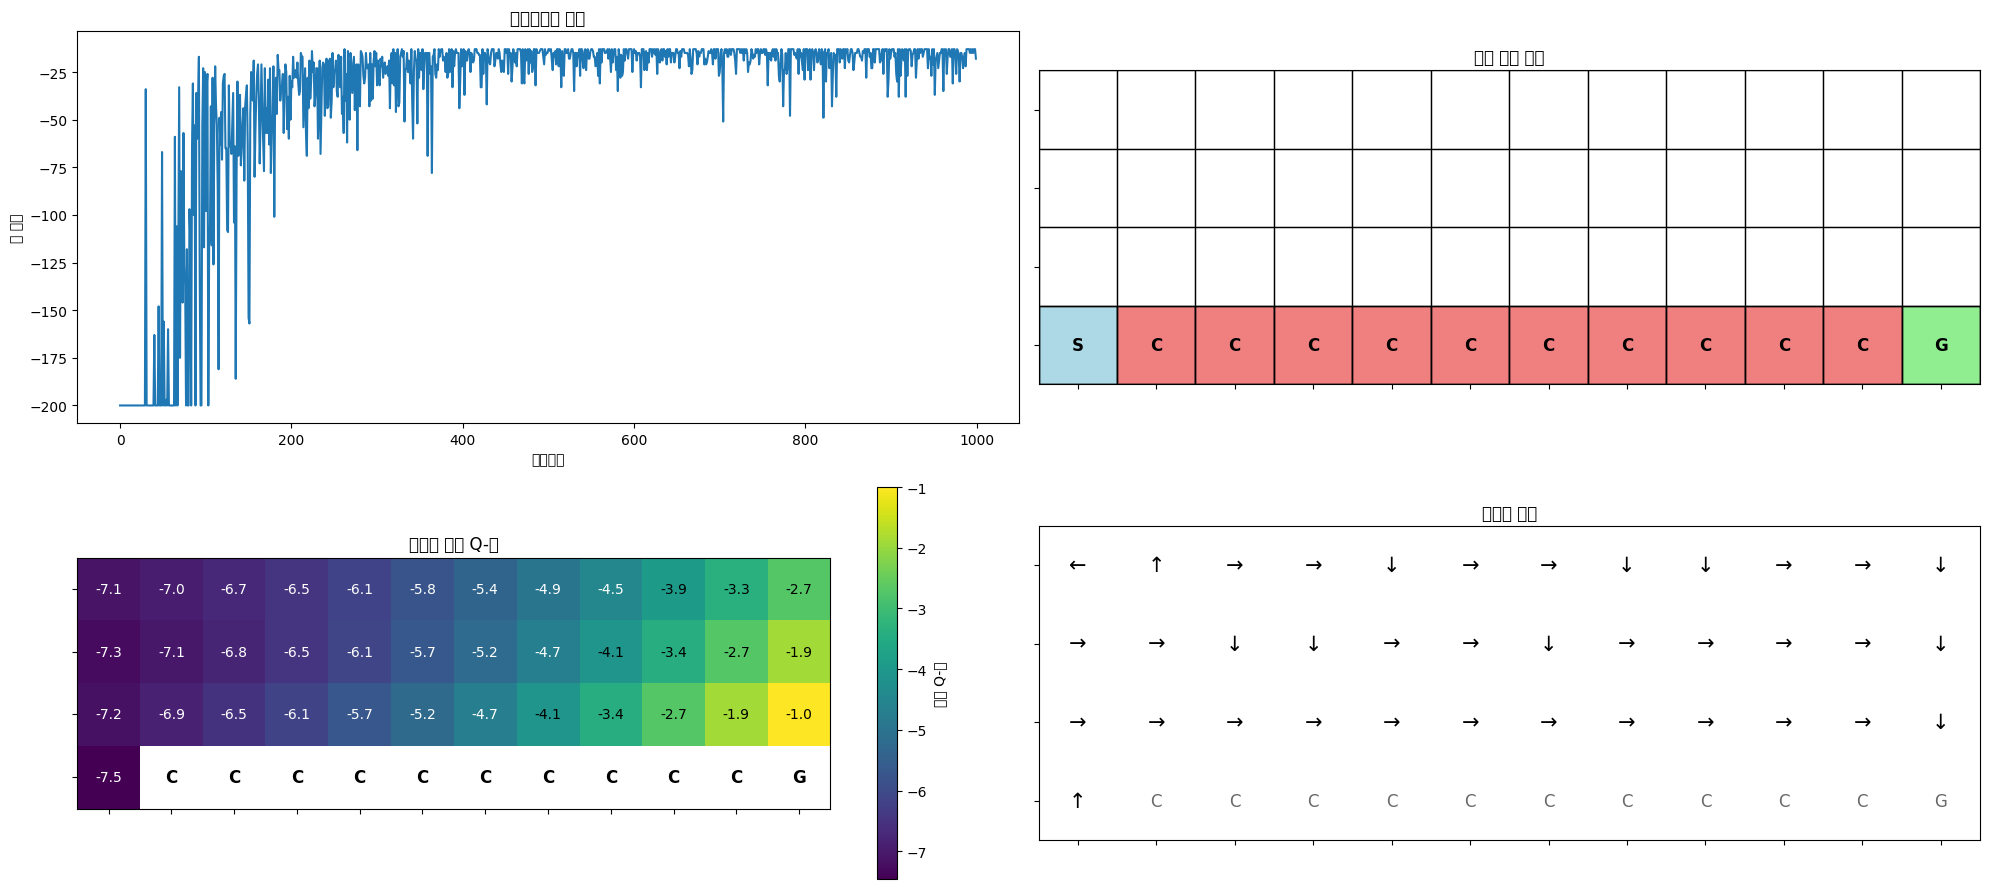

In [29]:
# 절벽 걷기 환경에서 Q-러닝 실행
alpha = 0.1  # 학습률
gamma = 0.9  # 할인율
initial_epsilon = 1.0  # 초기 탐험 비율
min_epsilon = 0.1  # 최소 탐험 비율
decay_rate = 0.005 # 엡실론 감소율 (조정됨)
episodes = 1000  # 에피소드 수 (증가됨)
max_steps = 200  # 에피소드당 최대 단계 수 (증가됨)

# Q-러닝 실행 (절벽 환경용 함수 사용)
cliff_q_table, cliff_rewards_per_episode, _ = run_q_learning_cliff(
    cliff_state_space, cliff_action_space, cliff_states, terminal_state, start_state, 
    rows, cols, alpha, gamma, initial_epsilon, min_epsilon, decay_rate, episodes, max_steps
)

# 시각화를 위한 2x2 그리드 생성
fig, axs = plt.subplots(2, 2, figsize=(20, 9)) # 크기 조정

# 왼쪽 상단 서브플롯에 보상 플로팅
plot_rewards(cliff_rewards_per_episode, ax=axs[0, 0])

# 오른쪽 상단 서브플롯에 환경 플로팅
plot_cliff_walking_env(cliff_grid_viz, cliff_states, terminal_state, start_state, ax=axs[0, 1])

# 왼쪽 하단 서브플롯에 Q-값 플로팅
plot_q_values_cliff(cliff_q_table, rows, cols, cliff_states, terminal_state, ax=axs[1, 0])

# 오른쪽 하단 서브플롯에 정책 플로팅
plot_policy_cliff(cliff_q_table, rows, cols, cliff_states, terminal_state, ax=axs[1, 1])

plt.tight_layout()
plt.show()

**주요 관찰 내용:**
1. **왼쪽 상단: 에피소드별 보상**  
   - 총 보상이 **점진적으로 증가**하며, 이는 에이전트가 시간이 지남에 따라 더 나은 정책을 학습하고 있음을 나타냅니다.  
   - **초기에 큰 폭의 음수 보상**이 관찰되며, 이는 에이전트가 절벽에 자주 빠졌음을 의미합니다. 학습이 진행됨에 따라 보상이 덜 부정적으로 변합니다. 
   - 후반부에도 보상이 약간 변동하는 것은 탐험(엡실론) 또는 환경의 확률적 요소 때문일 수 있습니다.

2. **오른쪽 상단: 절벽 걷기 그리드 표현**  
   - 환경은 **4행 12열 그리드**로 보입니다.  
   - **시작 지점(S)**은 왼쪽 하단에 있습니다.  
   - **목표 지점(G)**은 오른쪽 하단에 있습니다.  
   - 빨간색으로 표시된 **절벽(C)**은 맨 아래 행을 따라 있으며, 에이전트가 이곳을 밟으면 큰 페널티(-100)를 받고 시작 지점으로 돌아갑니다.

3. **왼쪽 하단: 상태별 최대 Q-값**  
   - 이 히트맵은 각 상태의 **가장 높은 Q-값**을 나타냅니다.  
   - 예상대로 **목표 지점(G)에 가까워질수록 값이 증가**합니다.  
   - **절벽 바로 위 행(행 2)**의 값들이 상대적으로 높게 나타나며, 이는 절벽을 피해가는 안전한 경로의 가치를 반영합니다. 절벽 지역 자체는 시각화에서 제외되었습니다.

4. **오른쪽 하단: 학습된 정책**  
   - 이는 화살표를 사용하여 **상태별 최적 행동**을 보여줍니다.  
   - 대부분의 화살표는 **오른쪽(→)**을 가리키며 목표를 향해 에이전트를 안내합니다.  
   - 특히 **절벽 바로 위(행 2)**에서는 에이전트가 오른쪽으로 이동하는 안전한 경로를 명확히 학습했음을 보여줍니다. 
   - 시작 지점 근처에서는 위(↑)로 이동하여 절벽을 피하려는 경향을 보입니다.

**분석:**
- **정책이 잘 학습**되었으며, 에이전트는 대부분 절벽을 피합니다.
- **초기 탐험으로 인해 초기 실패**가 발생했으며, 이는 보상 그래프의 급격한 하락에서 볼 수 있습니다.
- 이 환경을 해결하기 위해 **Q-러닝 또는 SARSA**를 사용했을 수 있습니다. 
  - **Q-러닝**이라면, 최적의 장기 전략(때로는 위험 감수)을 학습합니다.
  - **SARSA**라면, 현재 정책을 따르면서 더 안전한 정책(위험한 단계를 피함)을 학습하는 경향이 있습니다. (이 노트북은 Q-러닝을 사용했습니다.)

## 일반적인 문제점 및 해결책

**문제점: 큰 상태 공간에서의 느린 학습**

**해결책**: 이를 처리하는 몇 가지 접근 방식이 있습니다:
- 함수 근사 (신경망을 사용하여 Q-값 근사)
- 상태 집계 (유사한 상태 그룹화)
- 경험 리플레이 (과거 경험 재사용)

**문제점: 탐험과 활용의 균형 맞추기**

**해결책**: 
- 높은 탐험으로 시작 (높은 ε)
- 시간이 지남에 따라 점진적으로 탐험 감소 (ε 감소)
- 볼츠만 탐험과 같은 더 정교한 탐험 전략 사용

**문제점: 적절한 하이퍼파라미터 선택**

**해결책**:
- 학습률 (α): 0.1-0.3으로 시작
- 할인율 (γ): 일반적으로 0.9-0.99
- 탐험 비율 (ε): 높게 시작(0.9-1.0)하고 낮은 값(0.01-0.1)으로 감소
- 최적 설정을 찾기 위해 체계적으로 다른 조합 테스트

## Q-러닝 vs. 다른 강화 학습 알고리즘

### Q-러닝의 장점
- 이해하고 구현하기 간단함
- 모델-프리 (환경 역학을 알 필요 없음)
- 최적 정책을 직접 학습할 수 있음
- 이산적인 상태 및 행동 공간에서 잘 작동함

### Q-러닝의 한계
- 크거나 연속적인 상태 공간에서 어려움을 겪음
- 수렴 속도가 느릴 수 있음
- Q-값을 과대평가할 수 있음 (Double Q-Learning으로 해결)
- 연속적인 행동 공간에 직접 적용하기 어려움

### 관련 알고리즘
- **SARSA**: Q-러닝과 유사하지만 최대 Q-값 대신 실제 다음 행동을 사용
- **Deep Q-Network (DQN)**: 큰 상태 공간에 대해 Q-값을 근사하기 위해 신경망 사용
- **Double Q-Learning**: Q-러닝의 과대평가 문제 해결
- **함수 근사를 사용한 Q-러닝**: 크거나 연속적인 상태 공간에 함수 근사 사용

## 결론

Q-러닝은 많은 문제에 성공적으로 적용된 강력하고 직관적인 강화 학습 알고리즘입니다. 그 강점은 단순성과 환경 모델 없이 학습할 수 있는 능력에 있습니다. 매우 큰 상태 공간에 대한 한계가 있지만, Deep Q-Networks와 같은 확장을 통해 이러한 문제 중 다수가 해결되었습니다.

Q-러닝을 이해하는 것은 더 발전된 강화 학습 알고리즘과 개념을 탐구하기 위한 견고한 기반을 제공합니다. Q-러닝의 핵심 아이디어—경험을 통해 상태-행동 쌍의 가치를 학습하고 이 가치를 사용하여 결정을 내리는 것—는 현대 강화 학습 전반에 걸쳐 나타납니다.